# GridsearchCV
Performs hyperparameteroptimization even on estimators that don't have a *CV version.

In [1]:
import numpy as np

from sklearn.datasets import load_wine

wine = load_wine()

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.5, random_state=42)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()

pipe_knn = Pipeline([('scaler', scaler), ('knn', KNeighborsClassifier())])
pipe_log = Pipeline([('scaler', scaler), ('log', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000))])
pipe_rf = Pipeline([('scaler', scaler), ('rf', RandomForestClassifier())])

param_knn = {'knn__n_neighbors': list(range(1,50))}
param_log = {'log__l1_ratio': np.linspace(0,1,20)}
param_rf = {'rf__n_estimators': list(range(50,200,10))}

classifier_knn = GridSearchCV(pipe_knn, param_knn, cv=5, scoring='accuracy')
classifier_log = GridSearchCV(pipe_log, param_log, cv=5, scoring='accuracy')
classifier_rf = GridSearchCV(pipe_rf, param_rf, cv=5, scoring='accuracy')

In [4]:
classifier_knn.fit(X_train, y_train)
classifier_log.fit(X_train, y_train)
classifier_rf.fit(X_train, y_train)

c:\Users\isaka\.virtualenvs\MachineLearning-Isak-Andersson-nqPwo2ln\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\isaka\.virtualenvs\MachineLearning-Isak-Andersson-nqPwo2ln\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                              130, 140, 150, 160, 170, 180,
                                              190]},
             scoring='accuracy')

In [5]:
classifier_knn.get_params, classifier_log.get_params, classifier_rf.get_params

(<bound method BaseEstimator.get_params of GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('knn', KNeighborsClassifier())]),
              param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, ...]},
              scoring='accuracy')>,
 <bound method BaseEstimator.get_params of GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('log',
                                         LogisticRegression(max_iter=10000,
                                                            penalty='elasticnet',
                                                            solver='saga'))]),
              param_grid={'log__l1

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_knn = classifier_knn.predict(X_test)
y_pred_log = classifier_log.predict(X_test)
y_pred_rf = classifier_rf.predict(X_test)

print(classification_report(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_log))
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.94      0.97      0.96        34
           2       1.00      1.00      1.00        22

    accuracy        

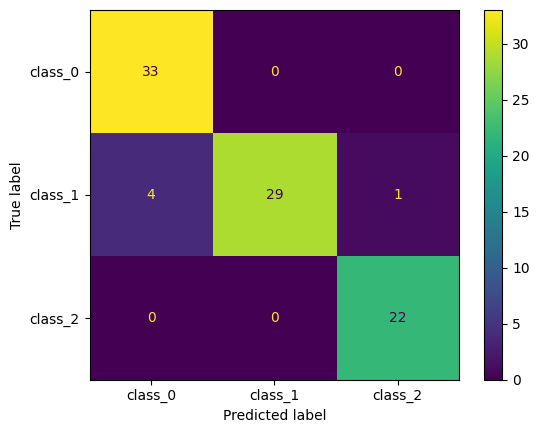

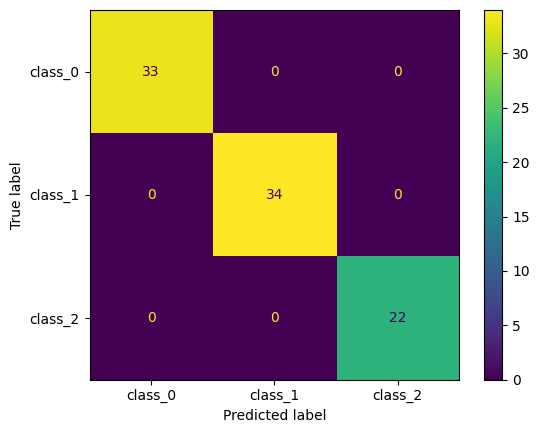

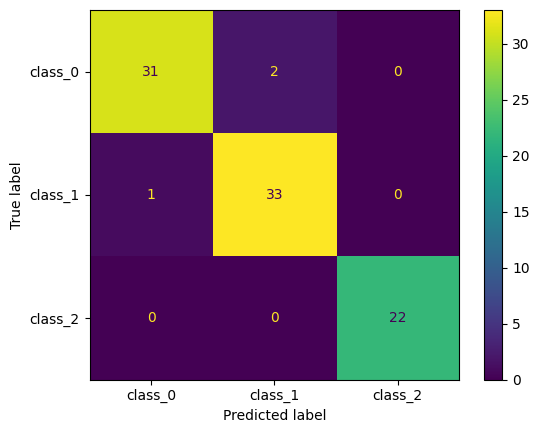

In [7]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=wine.target_names).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log), display_labels=wine.target_names).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=wine.target_names).plot()

In [8]:
import joblib

joblib.dump(classifier_log, 'test_model_log.joblib')

['test_model_log.joblib']

In [9]:
my_model = joblib.load('test_model_log.joblib')

my_model.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       1])